# Análise Exploratória de Dados

A análise exploratória de dados (em inglês: "Exploratory data analysis" - EDA) é uma das etapas mais importantes de um projeto de *Machine Learning*. Os objetivos desta etapa são:

- Conhecer o dataset em termos gerais
- Conhecer a natureza de cada feature
- Identificar anomalias e outliers
- Identificar features redundantes, features uteis, etc.

In [166]:
import pandas as pd

## Inicio: ler o dataset

Um dataset pequeno como o do exercício a seguir pode ser lido integralmente na memória RAM com um simples comando:

In [167]:
df = pd.read_csv('https://raw.githubusercontent.com/hsandmann/biblio/refs/heads/main/data/housing.csv')

Para datasets maiores existem outras bibliotecas que permitem trabalhar com arquivos imensos ou mesmo com datasets distribuidos em multiplos arquivos, como o [Dask Dataframes](https://docs.dask.org/en/stable/dataframe.html).

Com datasets tão grandes que nem cabem no disco e tem que ser armazenados em sistemas de arquivo distribuidos (como o [Amazon S3](https://aws.amazon.com/pt/pm/serv-s3/)) podemos usar o [Spark](https://spark.apache.org/) ou, novamente, o Dask Dataframes.

## Verificações iniciais

Vamos fazer verificações de "sanidade mental". O dataset que estamos utilizando é proveniente do capítulo 2 do livro texto da disciplina:

<img src="https://m.media-amazon.com/images/I/81qHV3ACapL._SL1500_.jpg" width=50%>


Este dataset contém informações agregadas sobre diferentes distritos residenciais do estado da Califórnia, nos Estados Unidos, que foram coletadas nos anos 1990. Cada linha do dataset representa um distrito residencial, e as colunas contêm diversas características socioeconômicas e geográficas desses distritos, bem como o valor médio das casas nesses locais.

Trata-se de um dataset famoso na comunidade de Ciência dos Dados, comumente chamado de ["California Housing"](https://lib.stat.cmu.edu/datasets/). A versão aqui incluida contém modificações em relação ao dataset original, para que possamos exercitar uma ampla variedade de cenários.

Para realizar os exercícios a seguir consulte a documentação da biblioteca [Pandas](https://pandas.pydata.org/)

In [168]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


As dimensões do dataset podem ser obtidos por:

In [169]:
df.shape

(20640, 10)

In [170]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

**Exercício**

- Quantos *exemplos* existem na base de dados?
- Quantas colunas?
- O que cada coluna significa?
- Qual o tipo de cada coluna: contínua ou categórica?

No dataset deste exercício, a coluna `median_house_value` será usada como o *target*: o valor que desejamos prever. As demais colunas serão as *features*. Portanto, nosso problema é de **regressão**: queremos prever valores contínuos.

Um pouco de nomenclatura:

- Neste curso, seguindo a nomenclatura do livro texto, vamos denotar o número de exemplos no dataset por $m$, e o número de *features* por $n$.
- Desta forma, nossa tabela de *features* será uma *matriz* de tamanho $m \times n$. É costumeiro usar a letra $X$ para indicar essa matriz de $m$ exemplos por $n$ *features*.
- O target é um vetor com o mesmo número de posições que o número de exemplos, ou seja, um vetor de tamanho $m$. Usamos a letra $y$ para indicar o vetor *target*.

Vamos separar as *features* do *target* neste dataset:

In [171]:
X = df.drop('median_house_value', axis=1).copy()
y = df['median_house_value'].copy() #target

X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


## Separação treino-teste

Conforme vimos na aula anterior, é importante ter dois conjunto de exemplos independentes, e provenientes da mesma *população*:

- O **conjunto de treino**: permite ensinar o computador a partir de exemplos, ou seja, *treinar* o modelo.
- O **conjunto de teste**: usado para medir o desempenho do modelo treinado em um dataset independente.

**Exercício**

Relembre as discussões da aula passada e enuncie os seguintes conceitos:

- Underfitting
- Overfitting

A biblioteca [Scikit-Learn](https://scikit-learn.org/) contém vários componentes para ajudar em nossos projetos de Machine Learning: modelos, processadores de dados, ferramentas de avaliação e seleção de parâmetros, implementação de modelos, etc. Será a principal ferramenta do nosso curso. Vamos usar o Scikit-Learn para dividir o dataset original em duas partes: um conjunto de treino e um de teste.

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

In [173]:
X.shape, y.shape

((20640, 9), (20640,))

In [174]:
X_train.shape, y_train.shape

((16512, 9), (16512,))

In [175]:
X_test.shape, y_test.shape

((4128, 9), (4128,))

--------------------
--------------------

**Exercício**

##### Pesquise sobre "geração de números pseudo-aleatórios" e explique o papel do argumento `random_state` na função acima, e sua importância.

**RESPOSTA:**

##### Usamos o random_state para controlar a aleatoriedade para manter cada execução com os mesmos resultados
--------------------
--------------------

Mas por que fizemos a separação treino-teste antes de qualquer análise, se nem ao menos vamos construir um modelo preditivo nesta aula?

Novamente, lembre-se da aula anterior. É importante que **o conjunto de teste não deve influenciar o processo de treino**, para que possamos conhecer o desempenho real do nosso sistema em amostras *novas*, não usadas no treino.

O que aconteceria se fizéssemos uma análise exploratória no conjunto completo (treino junto com teste) de dados? Estaríamos "dando uma espiadinha" (*snooping*) no conjunto de teste, e isso poderia impactar nossas *escolhas* na construção do modelo preditivo e no processo de teste, contrariando o princípio acima! Este erro processual chama-se *data snooping*, e deve ser evitado.

Logo, vamos adotar os seguintes princípios:

- **O conjunto de treino pode ser usado à vontade**;
- **O conjunto de teste É SAGRADO e vai ser usado apenas para um propósito: medir o desempenho preditivo do modelo treinado**. Não olhe para ele, não chegue perto, não tome conhecimento da existência dele antes da hora!

## Análise univariada

Vamos usar as ferramentas da análise exploratória para conhecer melhor nossos dados.

- **Medidas descritivas para variáveis contínuas**
    - **Posição**: média, mediana, moda
    - **Espalhamento**: desvio padrão, intervalo inter-quartil, valores máximo e mínimo

- **Medidas descritivas para variáveis categóricas**
    - **Frequência**: contagem de número de exemplos por categoria

- **Visualização**
    - **variáveis contínuas**: histograma, boxplot
    - **variáveis categóricas**: gráfico de barras

**Exercício**

Gere as métricas descritivas e as visualizações para cada *feature* e para o *target* no conjunto de treino.

In [176]:
X_train.drop(columns=["ocean_proximity"]).agg([
"mean",
"median",
"std",
"min",
"max",
lambda x: x.quantile(0.75) - x.quantile(0.25)])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
mean,-119.565121,35.631252,28.592720,2635.515928,538.923420,1428.123123,500.259993,3.863585
median,-118.490000,34.250000,29.000000,2129.000000,437.000000,1169.000000,411.000000,3.524600
std,1.999323,2.133670,12.618367,2142.925654,418.202807,1134.043862,379.273307,1.907402
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100
<lambda>,3.770000,3.780000,19.000000,1697.500000,352.000000,938.000000,326.000000,2.165850


In [177]:
y_train.agg([
"mean",
"median",
"std",
"min",
"max",
lambda x: x.quantile(0.75) - x.quantile(0.25)])

mean        206111.152980
median      179200.000000
std         114790.075691
min          14999.000000
max         500001.000000
<lambda>    144400.000000
Name: median_house_value, dtype: float64

In [178]:
X_train.mode()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-118.3,34.06,52.0,1613.0,280.0,761.0,306.0,15.0001,<1H OCEAN


In [179]:
y_train.mode()

0    500001.0
Name: median_house_value, dtype: float64

In [180]:
X_train["ocean_proximity"].value_counts(normalize=True) *100

ocean_proximity
<1H OCEAN     44.289002
INLAND        31.952519
NEAR OCEAN    12.663517
NEAR BAY      11.064680
ISLAND         0.030281
Name: proportion, dtype: float64

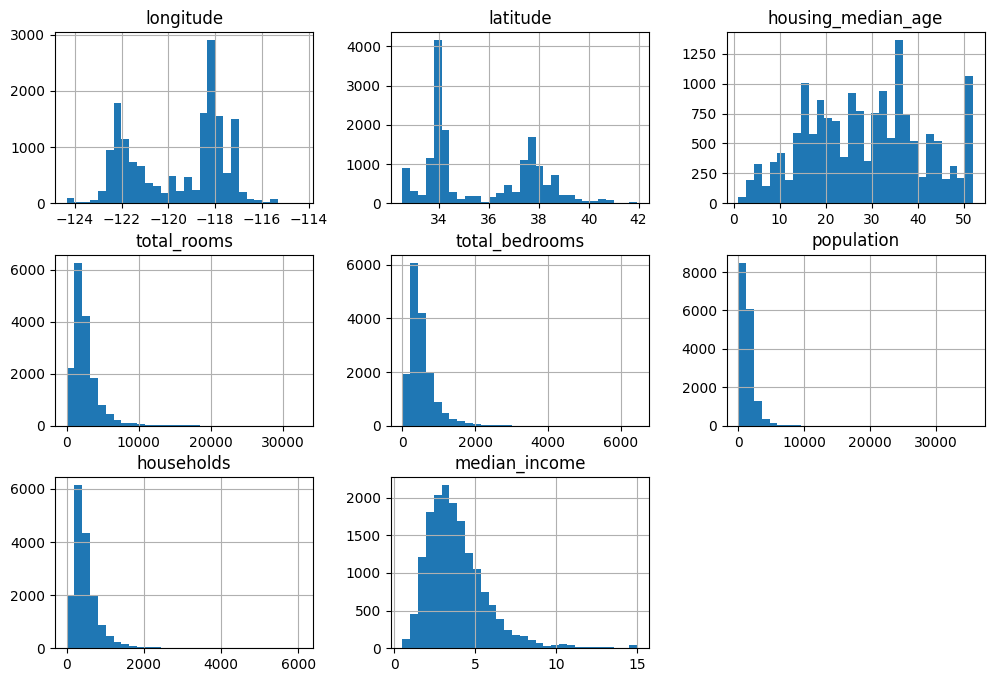

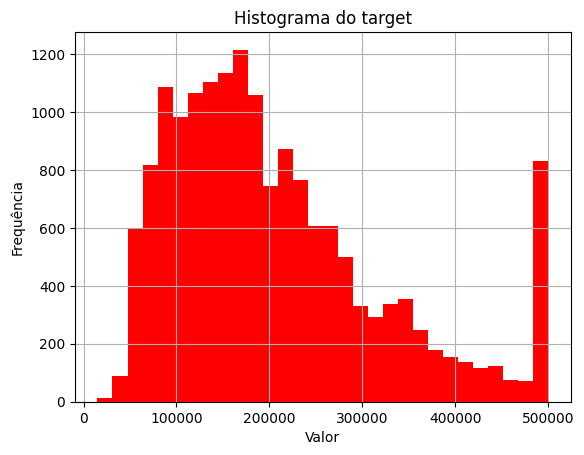

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X_train.drop(columns=["ocean_proximity"]).hist(
    bins=30,
    figsize=(12, 8)
)
plt.show()

y_train.hist(bins=30, color="red")

plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.title("Histograma do target")

plt.show()


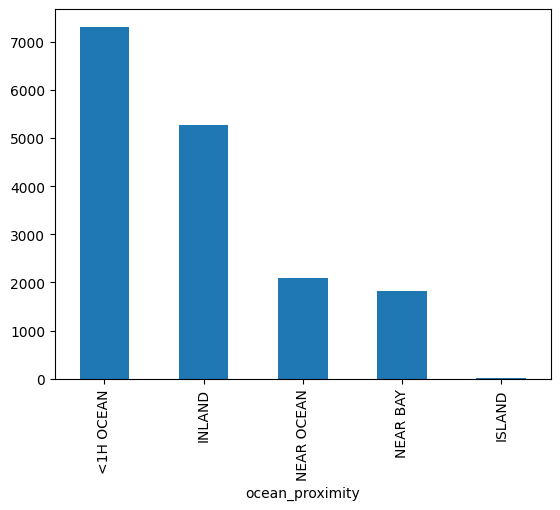

In [182]:
X_train["ocean_proximity"].value_counts().plot.bar()
plt.show()

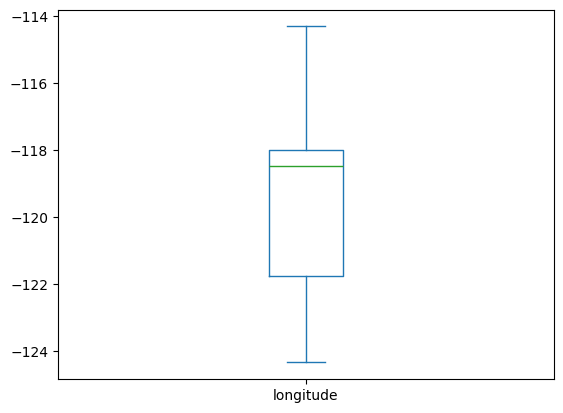

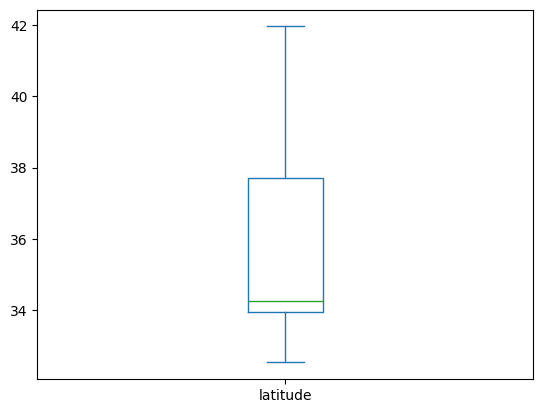

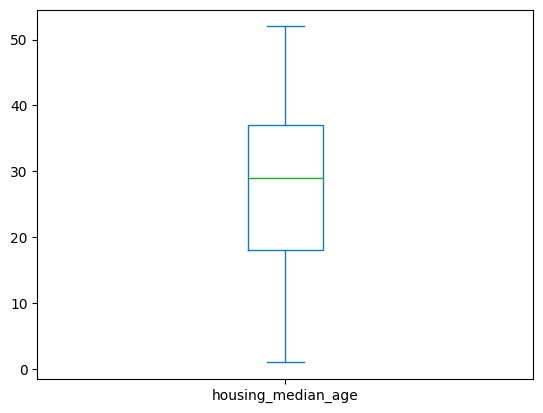

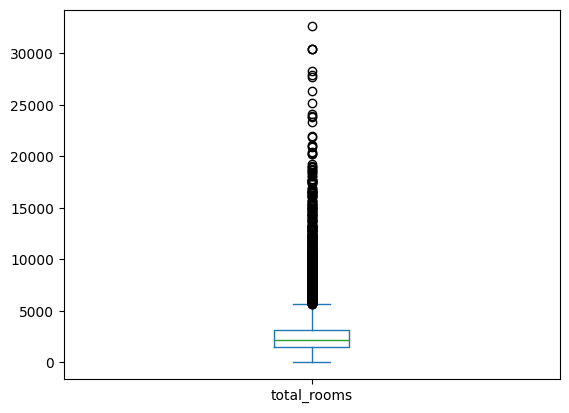

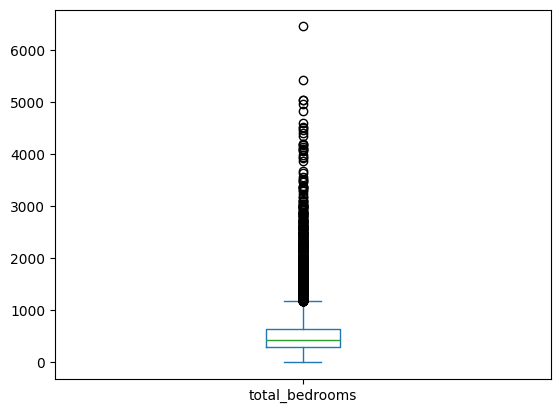

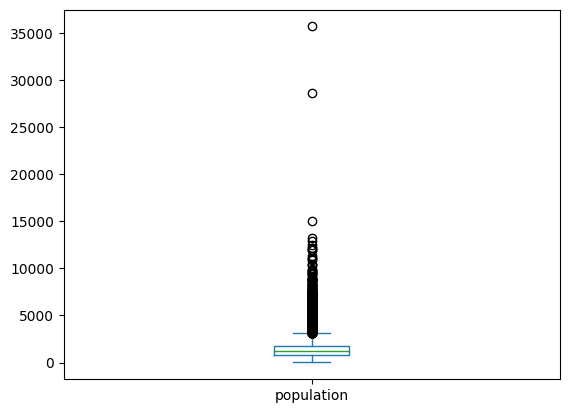

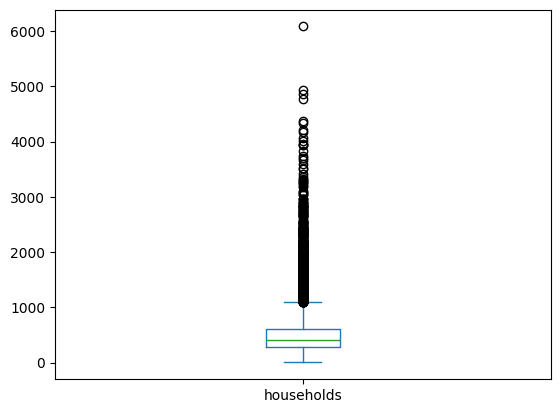

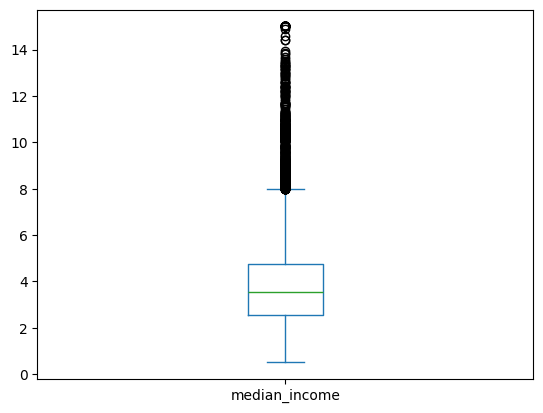

In [183]:
X_train["longitude"].plot.box()
plt.show()


X_train["latitude"].plot.box()
plt.show()


X_train["housing_median_age"].plot.box()
plt.show()


X_train["total_rooms"].plot.box()
plt.show()


X_train["total_bedrooms"].plot.box()
plt.show()


X_train["population"].plot.box()
plt.show()


X_train["households"].plot.box()
plt.show()


X_train["median_income"].plot.box()
plt.show()

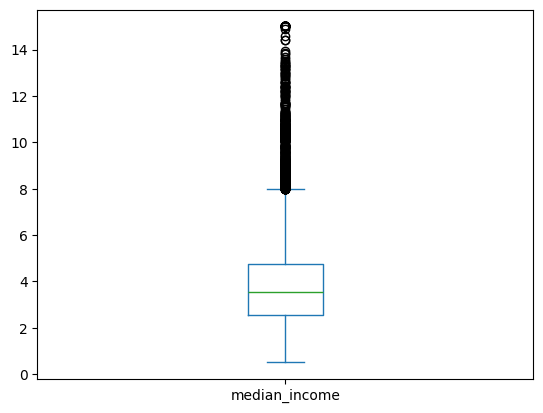

In [184]:
X_train["median_income"].plot.box()
plt.show()

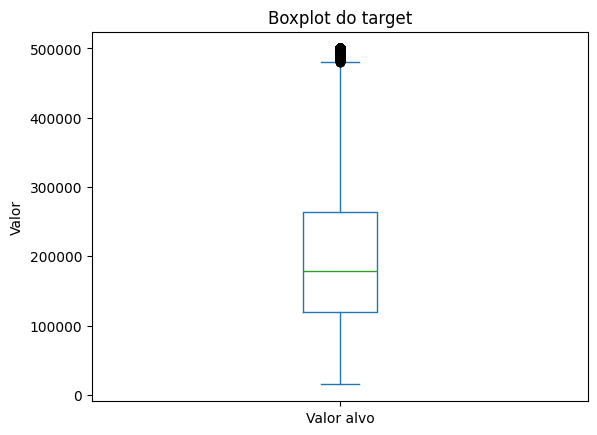

In [185]:
# --------------------------

y_train.plot.box(label="Valor alvo")

plt.ylabel("Valor")
plt.title("Boxplot do target")

plt.show()

O que estamos procurando?

- Anomalias: dados faltantes, fenômenos de saturação
- Outliers:
    - Variáveis contínuas: valores muito fora do normal
    - Variáveis categóricas: categorias com frequência muito baixa ou muito alta, com grande disparidade em relação às demais
- Erros grosseiros, problemas com conversão de dados
    - Acontece com muita frequência, especialmente para dados que não tem padronização universalmente aceita como datas

Além destes comportamentos anômalos, devemos também observar o comportamento normal das variáveis:

- A distribuição (histograma) é simétrica ou assimétrica? Possui cauda longa para algum dos lados?
- A variável apresenta valores positivos e negativos, ou apenas valores positivos (ou apenas negativos)? É bastante concentrada ou espalhada?

**Exercício**

Analise as *features* e o *target* deste dataset.

## Análise bivariada

Primeiro vamos fazer uma análise descritiva. As principais ferramentas aqui são:

- Entre variáveis contínuas: [**correlação**](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient);
- Entre variáveis categóricas: [**coeficiente V de Cramér**](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V);
- Entre uma variável contínua e uma categórica: [**teste de Kruskal-Wallis**](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_test).

In [186]:
X_train.drop(columns=["ocean_proximity"]).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924341,-0.110786,0.043100,0.069439,0.100706,0.056318,-0.014592
latitude,-0.924341,1.000000,0.012640,-0.036327,-0.069283,-0.110514,-0.073915,-0.079259
housing_median_age,-0.110786,0.012640,1.000000,-0.362433,-0.318544,-0.291842,-0.301198,-0.118410
total_rooms,0.043100,-0.036327,-0.362433,1.000000,0.928199,0.851766,0.916265,0.197326
total_bedrooms,0.069439,-0.069283,-0.318544,0.928199,1.000000,0.873484,0.979627,-0.011782
population,0.100706,-0.110514,-0.291842,0.851766,0.873484,1.000000,0.903045,0.000883
households,0.056318,-0.073915,-0.301198,0.916265,0.979627,0.903045,1.000000,0.009366
median_income,-0.014592,-0.079259,-0.118410,0.197326,-0.011782,0.000883,0.009366,1.000000


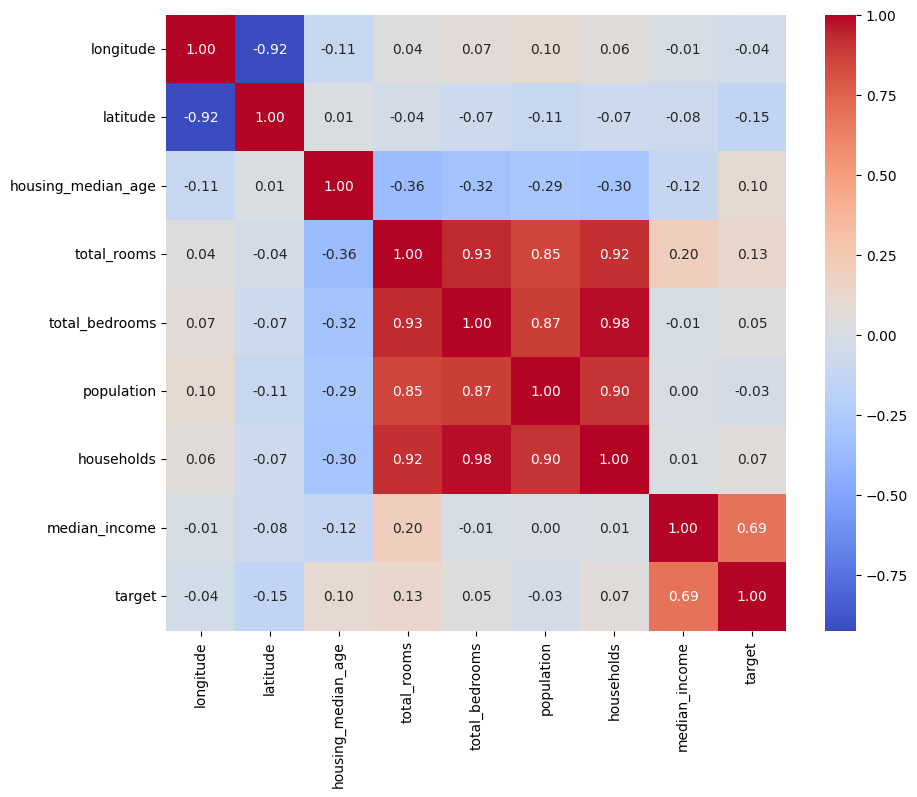

In [194]:
X_num = X_train.drop(columns=["ocean_proximity"])

df_corr = X_num.copy()
df_corr["target"] = y_train

corr = df_corr.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, 
            annot=True,
            cmap="coolwarm",
            fmt=".2f")
plt.show()

In [188]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_v(X_train["ocean_proximity"], y_train)


np.float64(0.5266958722647888)

In [199]:
from scipy.stats import kruskal

results = {}

for col in X_train.columns:
    
    if col != "ocean_proximity" and X_train[col].dtype != "object":
        
        groups = [
            X_train[X_train["ocean_proximity"] == cat][col]
            for cat in X_train["ocean_proximity"].unique()
        ]
        
        stat, p = kruskal(*groups)
        
        results[col] = {
            "estatistica": stat,
            "p_valor": p
        }

results_df = pd.DataFrame(results).T.sort_values("p_valor")

results_df

,estatistica,p_valor
longitude,4021.401329,0.000000e+00
latitude,5755.561913,0.000000e+00
housing_median_age,1540.820106,0.000000e+00
median_income,1092.781508,2.778484e-235
population,248.326809,1.492780e-52
households,118.883378,9.249945e-25
total_rooms,11.213082,2.427081e-02
total_bedrooms,NaN,NaN


**Exercício**

Faça a análise descritiva e determine pares de variáveis com alta associação.

## Associacao entre Ocean proximity e df

| Variável           | p-valor | Interpretação                  |
| ------------------ | ------- | ------------------------------ |
| longitude          | 0       | Fortemente associado           |
| latitude           | 0       | Fortemente associado           |
| housing_median_age | 0       | Associado                      |
| median_income      | ~0      | Associado                      |
| population         | ~0      | Associado                      |
| households         | ~0      | Associado                      |
| total_rooms        | 0.024   | Associado (mas bem mais fraco) |
| total_bedrooms     | NaN     | Problema de NaN                |


Agora vamos fazer visualizações para:

- pares de *features* com alta associação
- *target* versus cada uma das *features*

Use as ferramentas adequadas:

- Entre variáveis contínuas: **gráfico de espalhamento**;
- Entre variáveis categóricas: **matriz de contingência**;
- Entre uma variável contínua e uma categórica: **boxplot da contínua por categoria da categórica**;

**Exercício**

Você sabe o que fazer

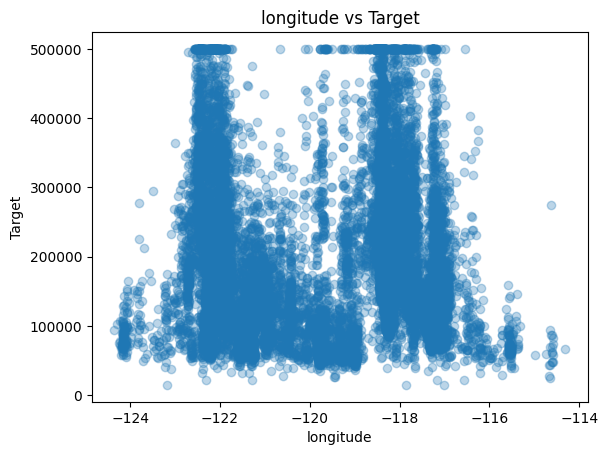

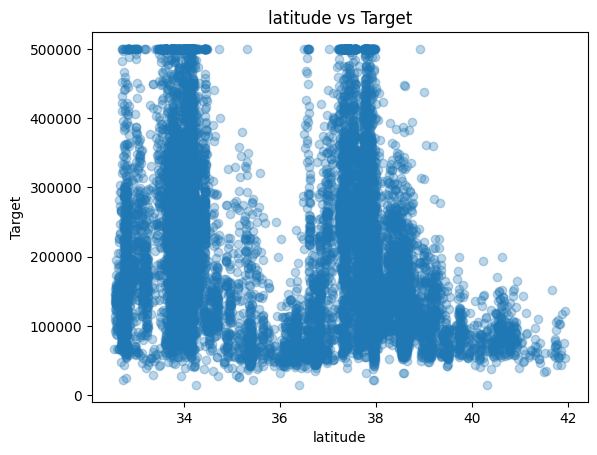

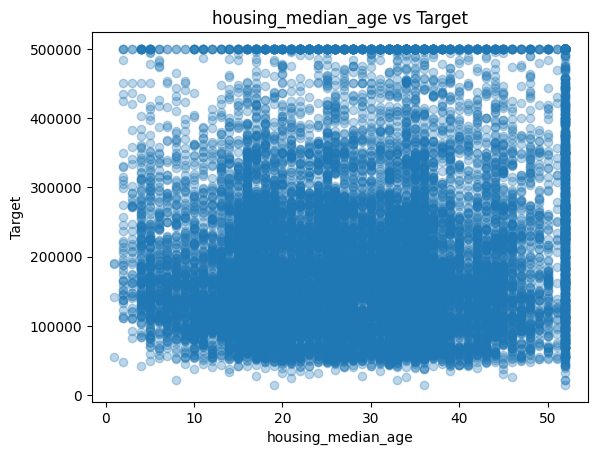

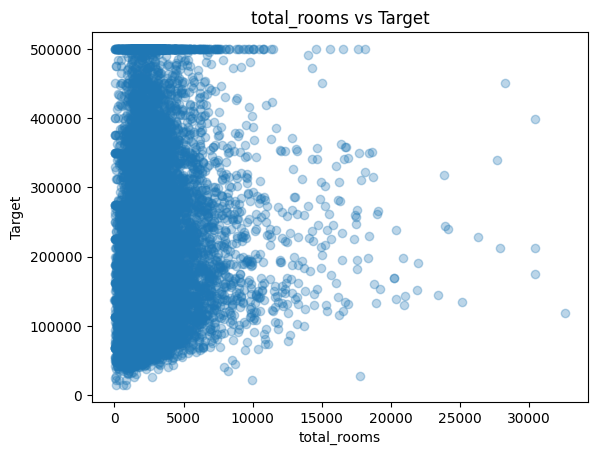

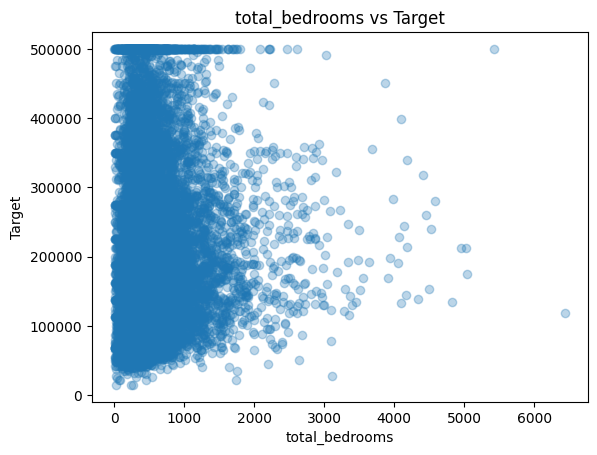

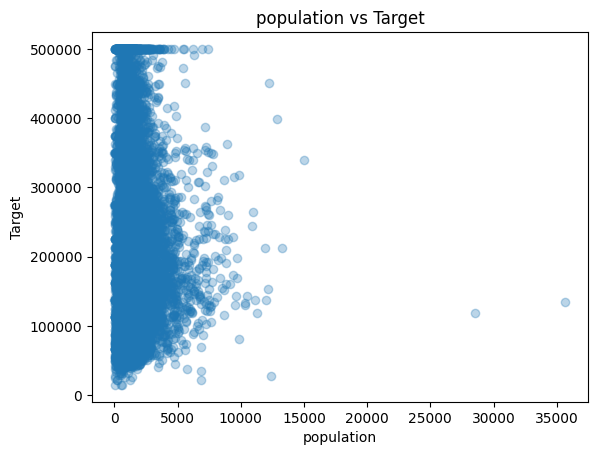

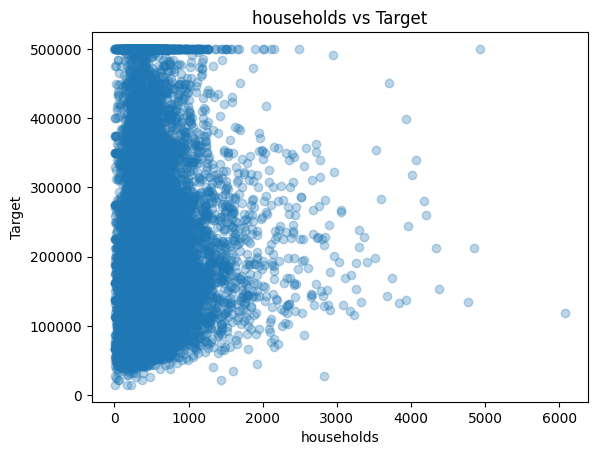

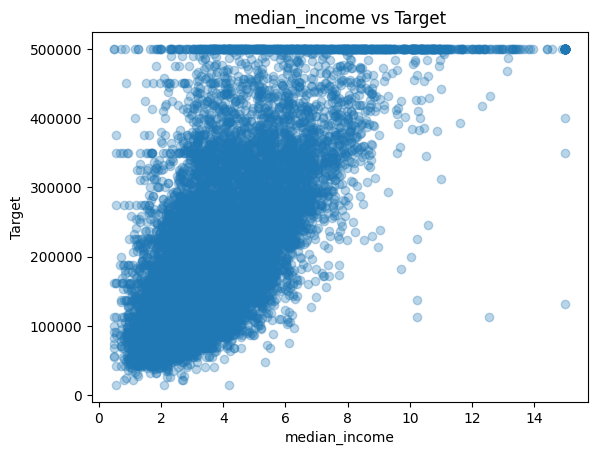

In [208]:
for col in X_num.columns:
    plt.figure()
    plt.scatter(X_num[col], y_train, alpha=0.3)
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.title(f"{col} vs Target")
    plt.show()

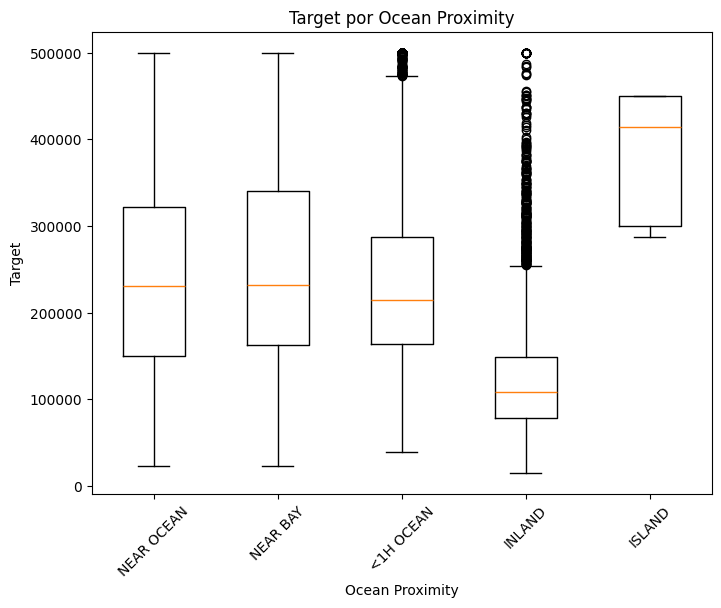

In [207]:
categorias = X_train["ocean_proximity"].unique()

dados = [
    y_train[X_train["ocean_proximity"] == cat]
    for cat in categorias
]

plt.figure(figsize=(8,6))
plt.boxplot(dados, tick_labels=categorias)

plt.xticks(rotation=45)
plt.xlabel("Ocean Proximity")
plt.ylabel("Target")
plt.title("Target por Ocean Proximity")

plt.show()

Assim como na análise univariada, procure anomalias, outliers, etc.. Observe também:

- *Features* com associação muito **forte** entre si: pode indicar redundância de *features*. Em casos extremos, podemos descobrir que duas *features* são, na verdade, a mesma *feature*, e portanto uma delas deve ser eliminada. Exemplos:
    - Temperatura em $C$, $F$ e $K$
    - Preço em R$ e US$ (supondo estabilidade da cotação, é claro)
    - As vezes a similaridade não é tão óbvia se não prestamos atenção. Por exemplo: peso e volume (coisas bem diferentes) em uma situação em que a densidade é a mesma (e.g. peso de um caminhão-tanque e volume de combustível, se os caminhões são todos do mesmo modelo).
- *Features* com associação muito **fraca** entre si: isso é ótimo, são provavelmente informações complementares!
- *Features* com associação muito **forte** com o *target*: isso é bom, indica uma *feature* que pode ser que tenha um bom valor preditivo. Mas... ***CUIDADO***!!! É raro mas acontece muito (kkkkk!) casos em que a *feature*... é o *target* disfarçado! Em geral, se a capacidade preditiva do seu modelo é:
    - muito ruim: pode ser assim mesmo ou pode ser que você fez algum erro
    - mais ou menos: é mais um dia de trabalho do cientista de dados, normal
    - boa: deu sorte, hein?
    - muito boa: esmola demais, o santo desconfia... se o seu modelo de repente é perfeito, certamente tem alguma *feature* que é o *target* de chapeu e bigodinho, acredite!
- *Features* com associação muito **fraca** com o *target*: podem ser *features* lixo, a serem descartadas. Nada em Machine Learning é muito definitivo, em geral é melhor testar tudo, mas se for necessário eliminar *a priori* alguma *feature* (pois excesso de features com falta de volume de exemplos impede o bom treinamento), esse pode ser um critério.

**Exercício**

Determine as melhores *features* em termos de sua relação com o *target*